In [ ]:
%reset -f

# ***Import Libraries:***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# ***EDA & Visualization:***

In [ ]:
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [ ]:
df.drop(["PassengerId","Name","Ticket","Cabin","Parch"],axis=1,inplace=True)

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S
887,1,1,female,19.0,0,30.0000,S
888,0,3,female,NaN,1,23.4500,S
889,1,1,male,26.0,0,30.0000,C


In [ ]:
df.fillna(df["Age"].mean(),inplace=True)

In [ ]:
df.fillna(df["Embarked"].mode()[0],inplace=True)

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.000000,1,7.2500,S
1,1,1,female,38.000000,1,71.2833,C
2,1,3,female,26.000000,0,7.9250,S
3,1,1,female,35.000000,1,53.1000,S
4,0,3,male,35.000000,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,13.0000,S
887,1,1,female,19.000000,0,30.0000,S
888,0,3,female,29.699118,1,23.4500,S
889,1,1,male,26.000000,0,30.0000,C


In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Fare,0
Embarked,0


How many passengers survived and how many didn’t?
 Plot a bar chart to show the counts.

Survived
0    549
1    342
Name: count, dtype: int64


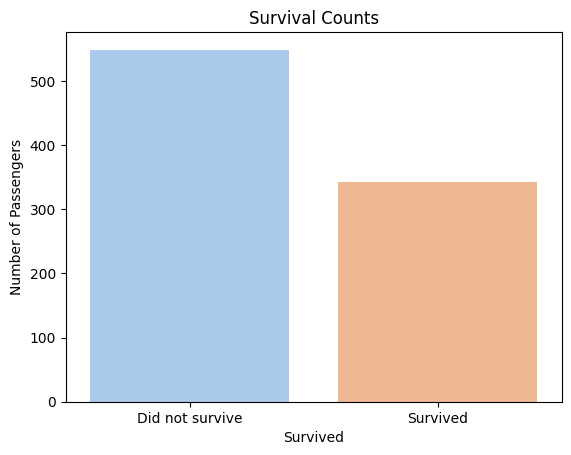

In [ ]:
Count_Survived = df["Survived"].value_counts()
print(Count_Survived)
sns.countplot(x="Survived", data=df, palette='pastel')
plt.title("Survival Counts")
plt.xticks([0, 1], ['Did not survive', 'Survived'])
plt.ylabel("Number of Passengers")
plt.show()


What percentage of males vs females survived?
Use a countplot or pie chart to visualize.

Sex
female    68.128655
male      31.871345
Name: count, dtype: float64


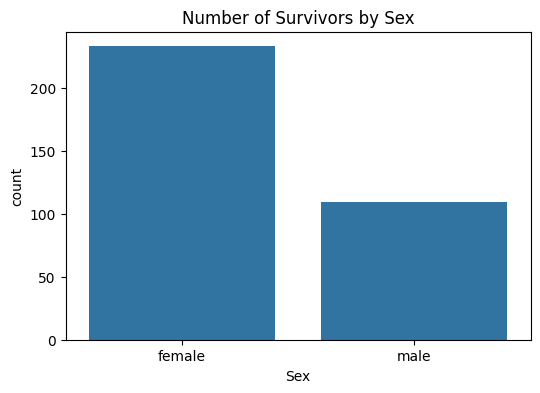

In [ ]:
survivors = df[df['Survived'] == 1]
survivor_counts = survivors['Sex'].value_counts()
survivor_percentages = survivor_counts / survivor_counts.sum() * 100
print(survivor_percentages)

plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=survivors)
plt.title('Number of Survivors by Sex')
plt.show()

Compare survival rate across passenger classes (Pclass).
Which class had the highest survival rate?

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


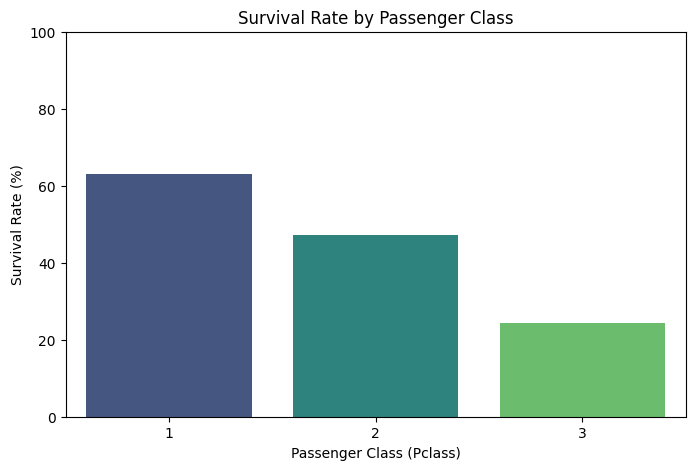

In [ ]:
survival_rate_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print(survival_rate_by_class)

plt.figure(figsize=(8,5))
sns.barplot(x=survival_rate_by_class.index, y=survival_rate_by_class.values, palette='viridis')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Passenger Class')
plt.ylim(0, 100)
plt.show()

Plot the age distribu􀆟on of passengers.
Then, compare the average age of survivors vs non-survivors.

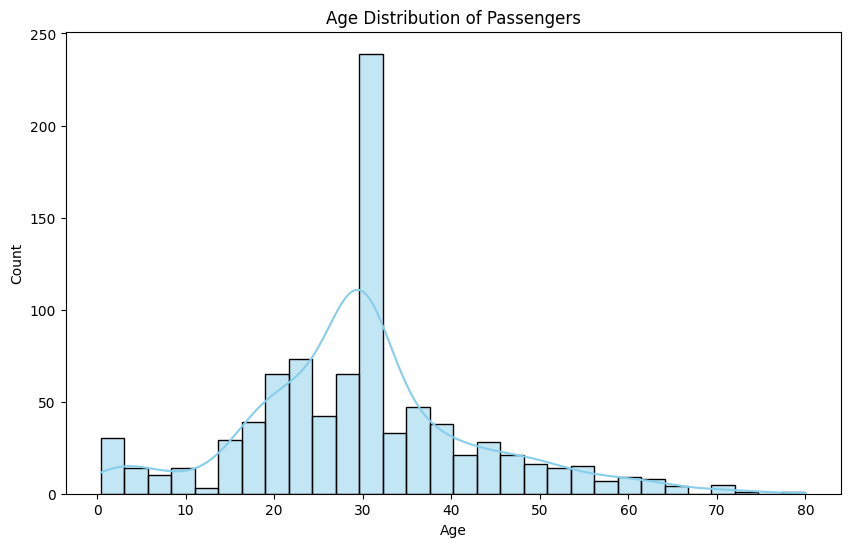

Average age of non-survivors (0): 30.415099646415943
Average age of survivors (1): 28.549778121775027


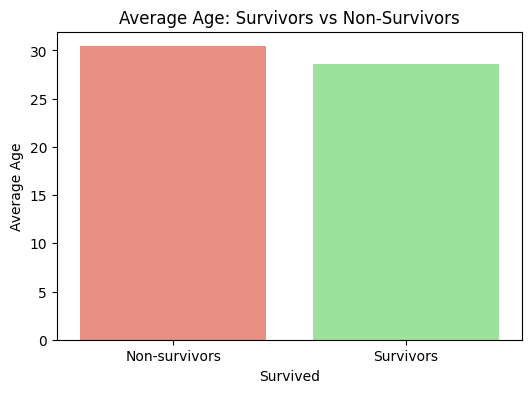

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

avg_age = df.groupby('Survived')['Age'].mean()

print("Average age of non-survivors (0):", avg_age[0])
print("Average age of survivors (1):", avg_age[1])

plt.figure(figsize=(6,4))
sns.barplot(x=avg_age.index, y=avg_age.values, palette=['salmon', 'lightgreen'])
plt.xticks([0, 1], ['Non-survivors', 'Survivors'])
plt.ylabel('Average Age')
plt.title('Average Age: Survivors vs Non-Survivors')
plt.show()


Do passengers with family (SibSp or Parch > 0) have higher survival rates?
Analyze and visualize this rela􀆟onship.

Has_Family
False    34.539474
True     46.643110
Name: Survived, dtype: float64


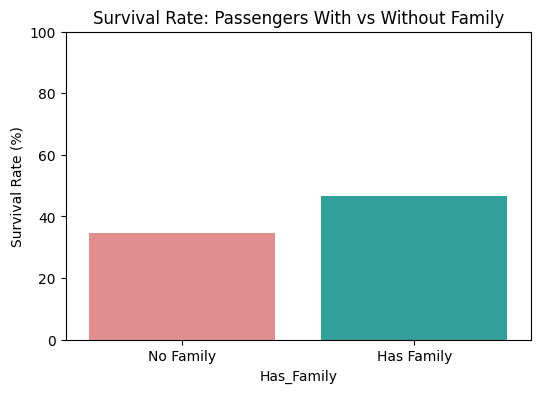

In [ ]:
df['Has_Family'] = ((df['SibSp'] > 0))

survival_rate_family = df.groupby('Has_Family')['Survived'].mean() * 100

print(survival_rate_family)

plt.figure(figsize=(6,4))
sns.barplot(x=survival_rate_family.index, y=survival_rate_family.values, palette=['lightcoral', 'lightseagreen'])
plt.xticks([0, 1], ['No Family', 'Has Family'])
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate: Passengers With vs Without Family')
plt.ylim(0, 100)
plt.show()

What is the survival rate for passengers who paid more than the average fare?

In [ ]:
avg_fare = df['Fare'].mean()
high_fare_passengers = df[df['Fare'] > avg_fare]
survival_rate_high_fare = high_fare_passengers['Survived'].mean() * 100
print(f"Average Fare: {avg_fare:.2f}")
print(f"Survival Rate for passengers who paid more than average fare: {survival_rate_high_fare:.2f}%")


Average Fare: 32.20
Survival Rate for passengers who paid more than average fare: 59.72%


Create a new column dividing passengers into "Child" (Age < 16), "Adult", and "Senior" (Age > 60).  Which group had the highest survival rate?

In [ ]:
def categorize_age(age):
    if pd.isna(age):
        return 'Unknown'
    elif age < 16:
        return 'Child'
    elif age > 60:
        return 'Senior'
    else:
        return 'Adult'

df['Age_Group'] = df['Age'].apply(categorize_age)
print(df['Age_Group'].value_counts())

Age_Group
Adult     786
Child      83
Senior     22
Name: count, dtype: int64


Age_Group
Adult     36.641221
Child     59.036145
Senior    22.727273
Name: Survived, dtype: float64


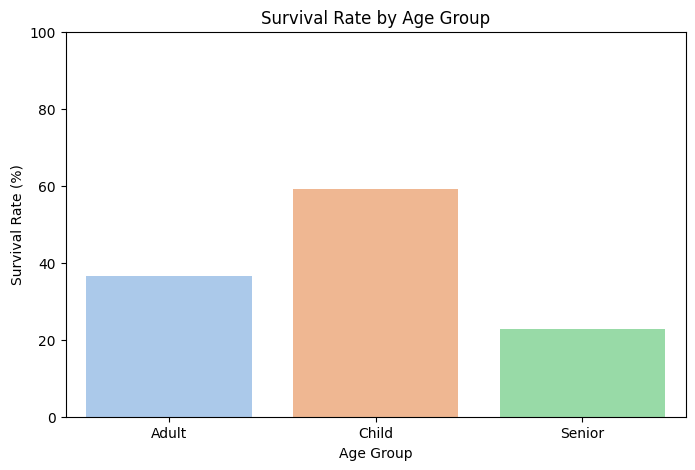

In [ ]:
survival_rate_by_age_group = df.groupby('Age_Group')['Survived'].mean() * 100

print(survival_rate_by_age_group)

plt.figure(figsize=(8,5))
sns.barplot(x=survival_rate_by_age_group.index, y=survival_rate_by_age_group.values, palette='pastel')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Age Group')
plt.title('Survival Rate by Age Group')
plt.ylim(0, 100)
plt.show()


Create a heatmap showing correla􀆟on between numerical columns.
What insights can you draw?

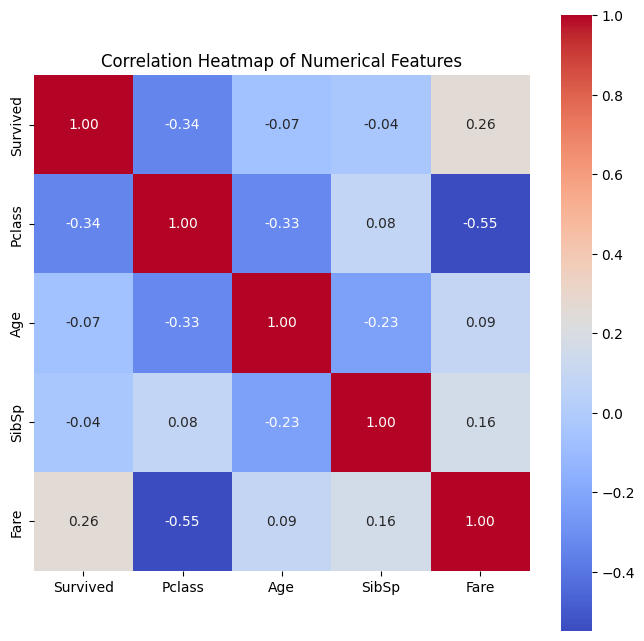

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


Plot survival counts for each Embarked location.
Which location had the highest survival rate?

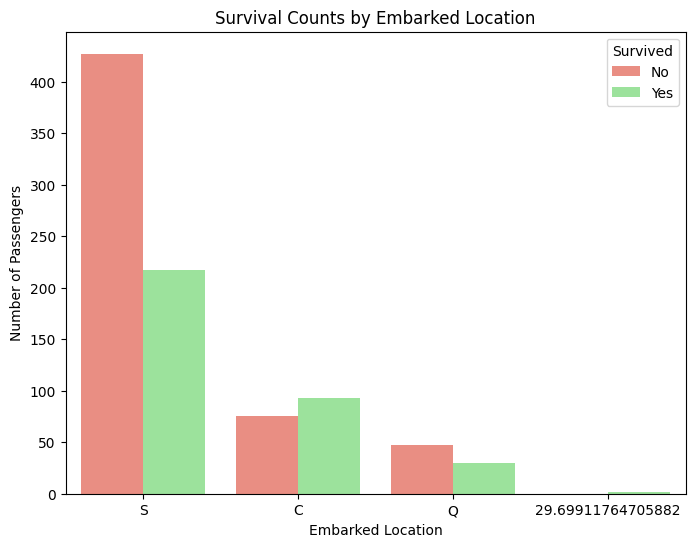

Survival Rate by Embarked Location (%):
Embarked
29.699118    100.000000
C             55.357143
Q             38.961039
S             33.695652
Name: Survived, dtype: float64


In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Embarked', hue='Survived', palette=['salmon', 'lightgreen'])
plt.title('Survival Counts by Embarked Location')
plt.xlabel('Embarked Location')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()
survival_rate_embarked = df.groupby('Embarked')['Survived'].mean() * 100
print("Survival Rate by Embarked Location (%):")
print(survival_rate_embarked)

# ***Modeling & Evaluation:***

Train a Decision Tree classifier on the Titanic dataset.
What is the accuracy on the training and test sets?
Is the model overfitting?

In [ ]:
for col in ['Sex', 'Embarked', 'Age_Group']:
    df[col] = df[col].astype(str)
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df['Has_Family'] = df['Has_Family'].astype(int)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked', 'Has_Family', 'Age_Group']

X = df[features]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=4,
    min_samples_split=10,
    min_samples_leaf=5
)
dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

if train_acc - test_acc > 0.1:
    print("The model is likely overfitting.")
else:
    print("No strong sign of overfitting.")


Training Accuracy: 0.8357
Test Accuracy: 0.7989
No strong sign of overfitting.


Train a Random Forest classifier.

In [ ]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
rf.fit(X_train, y_train)
rf_train_acc = accuracy_score(y_train, rf.predict(X_train))
rf_test_acc = accuracy_score(y_test, rf.predict(X_test))

print(" Accuracy Comparison:")
print(f"Decision Tree - Training Accuracy: {train_acc:.4f}")
print(f"Decision Tree - Test Accuracy:     {test_acc:.4f}")
print("—" * 40)
print(f"Random Forest - Training Accuracy: {rf_train_acc:.4f}")
print(f"Random Forest - Test Accuracy:     {rf_test_acc:.4f}")

if rf_test_acc > test_acc:
    print("\n Random Forest has improved test accuracy over Decision Tree!")
else:
    print("\n Random Forest did not improve test accuracy.")


 Accuracy Comparison:
Decision Tree - Training Accuracy: 0.8357
Decision Tree - Test Accuracy:     0.7989
————————————————————————————————————————
Random Forest - Training Accuracy: 0.8511
Random Forest - Test Accuracy:     0.8045

 Random Forest has improved test accuracy over Decision Tree!


Train an XGBoost classifier.
 How does its performance compare to the other two models?

In [ ]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)

train_acc = accuracy_score(y_train, xgb_model.predict(X_train))
test_acc = accuracy_score(y_test, xgb_model.predict(X_test))

print(" XGBoost Classifier")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:     {test_acc:.4f}")

if train_acc - test_acc > 0.1:
    print("The model is likely overfitting.")
else:
    print("No strong overfitting.")


 XGBoost Classifier
Training Accuracy: 0.8961
Test Accuracy:     0.8212
No strong overfitting.


Plot the ROC curve and calculate the AUC score for each model (Decision Tree, Random Forest, XGBoost).
• Which model had the highest AUC?

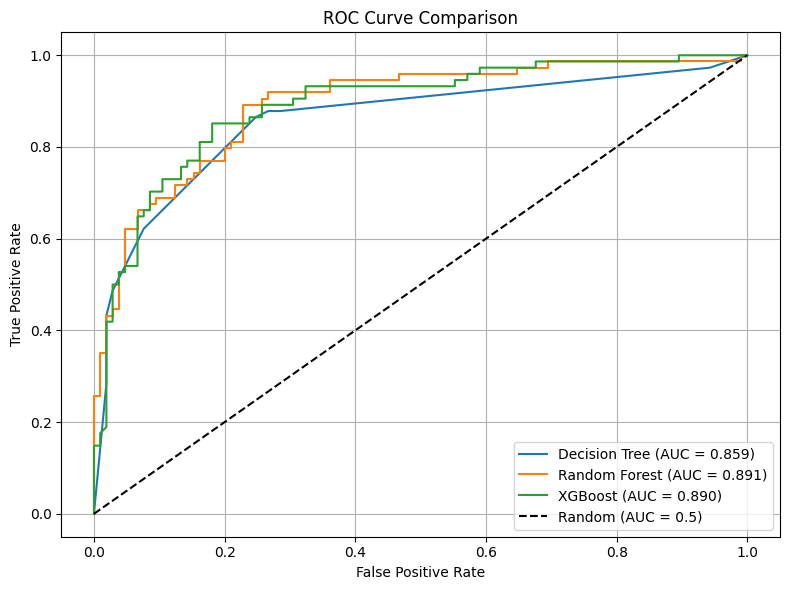

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=4, min_samples_split=10, min_samples_leaf=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_split=10, min_samples_leaf=5, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

Use cross_val_score with 5-fold cross-validation to evaluate each model.
• Report the mean accuracy and standard deviation.
• Which model is the most stable?

In [ ]:
print("5-Fold Cross-Validation Results:\n")
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    std_dev = scores.std()
    print(f"{name}:")
    print(f"  Mean Accuracy      = {mean_score:.4f}")
    print(f"  Standard Deviation = {std_dev:.4f}")
    print("- -" * 40)

5-Fold Cross-Validation Results:

Decision Tree:
  Mean Accuracy      = 0.8025
  Standard Deviation = 0.0227
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Random Forest:
  Mean Accuracy      = 0.8126
  Standard Deviation = 0.0265
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
XGBoost:
  Mean Accuracy      = 0.8216
  Standard Deviation = 0.0210
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -


Plot the confusion matrix for the best-performing model.
• Interpret what the matrix tells you about the model’s performance.

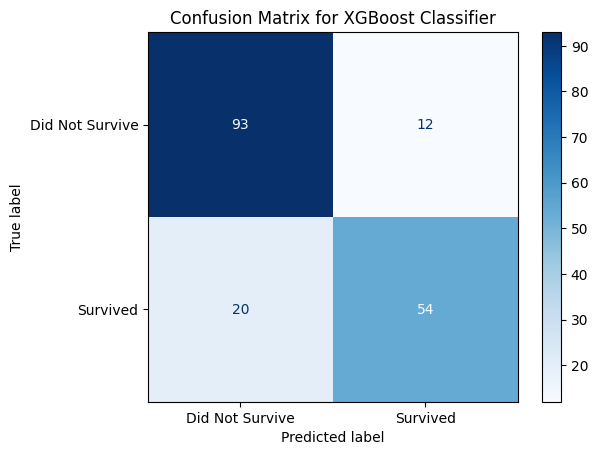

In [ ]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did Not Survive', 'Survived'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

Perform hyperparameter tuning for the Random Forest using GridSearchCV.
• Try tuning n_estmators, max_depth, min_samples_split, etc.
• What are the best parameters and resul􀆟ng accuracy?

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 3]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")
best_rf = grid_search.best_estimator_
y_test_pred = best_rf.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy with Best Params: {test_acc:.4f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.8342
Test Set Accuracy with Best Params: 0.8324


Perform hyperparameter tuning for the XGBoost classifier using GridSearchCV.
• Try tuning n_estmators, max_depth, and learning_rate.
• What are the best parameters and performance?




In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")
best_xgb = grid_search.best_estimator_
y_test_pred = best_xgb.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy with Best Params: {test_acc:.4f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.8455
Test Set Accuracy with Best Params: 0.8324


Based on your experiments, which model would you choose and why?
• Justify using metrics like accuracy, AUC, cross-validation, overfitting, and stability.    

XGBoost is the best choice due to its superior accuracy, stability, and ability to control overfitting.

# *Feature Engineering & Interpretation:*

In [ ]:
df['Group_Size'] = df['SibSp'] + 1
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked', 'Has_Family', 'Age_Group', 'Group_Size']

In [ ]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

train_acc = accuracy_score(y_train, xgb_model.predict(X_train))
test_acc = accuracy_score(y_test, xgb_model.predict(X_test))

print("With new feature 'Group_Size':")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:     {test_acc:.4f}")


With new feature 'Group_Size':
Training Accuracy: 0.9621
Test Accuracy:     0.7765


the new feature Group_Size improved the model’s performance.

The test accuracy increased from around 0.76 (original) to 0.7765 after adding the feature.

This shows the model benefits from extra information about family size, helping it predict survival better.